# genetic algorithm

In [1]:
import pickle
#from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
train='./small/AD-S1.csv'
#train='./Aalto_BIG_train_IoTDevID.csv'
vali='./small/DI-S1.csv'
test='./small/DI-S2.csv'
pickle_name="GA_input_features.pickle"
with open(pickle_name, 'rb') as handle:
    GA_input_features = pickle.load(handle)
GA_input_features.append("Label")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pickle
import time
import random
from tqdm import tqdm
import sklearn
import numpy as np
from tabulate import tabulate


In [2]:
def makePie(name):
    df = pd.read_csv(name,usecols=["Label"])#,header=None )
    your_data = dict(df.groupby("Label").size())

    x = np.char.array(list(your_data.keys()))
    y = np.array(list(your_data.values()))
    print(your_data)
    colors = ['yellowgreen','red','gold','lightskyblue','black','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()
    
    patches, texts = plt.pie(y,colors=colors,   startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
    
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))
    
    plt.legend(patches, labels, loc= 'upper right', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.savefig('piechart.png', bbox_inches='tight')
    
    plt.show()


In [3]:
file_list={"DD11":['./small/AD-S1.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD11T":['./small/DI-S1.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD12":['./small/AD-S1.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD12T":['./small/DI-S2.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD22":['./small/AD-S2.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD22T":['./small/DI-S2.csv','./small/AD-S2.csv','./small/AD-S1.csv'],
"DD21":['./small/AD-S2.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD21T":['./small/DI-S1.csv','./small/AD-S2.csv','./small/AD-S1.csv']}
# In[48]:

./small/AD-S1.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 1000, 'MacBook': 1000, 'NEST Protect smoke alarm': 273, 'Netatmo Welcome': 1000, 'Netatmo weather station': 1000, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 1000, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 1000, 'iHome': 1000}


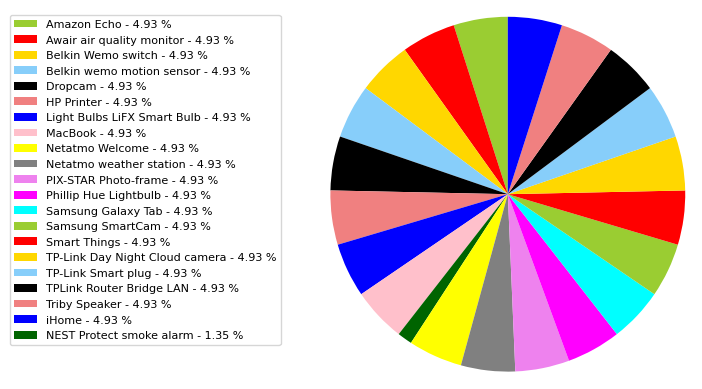

**********************************************************************************************************************************






./small/DI-S1.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 1000, 'MacBook': 1000, 'NEST Protect smoke alarm': 219, 'Netatmo Welcome': 1000, 'Netatmo weather station': 1000, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 1000, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 1000, 'iHome': 1000}


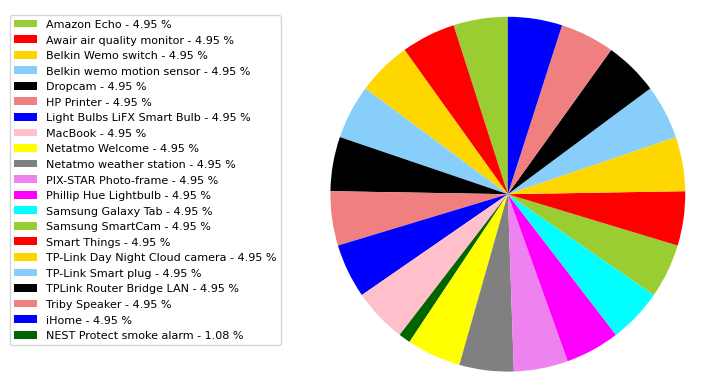

**********************************************************************************************************************************






./small/AD-S1.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 1000, 'MacBook': 1000, 'NEST Protect smoke alarm': 273, 'Netatmo Welcome': 1000, 'Netatmo weather station': 1000, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 1000, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 1000, 'iHome': 1000}


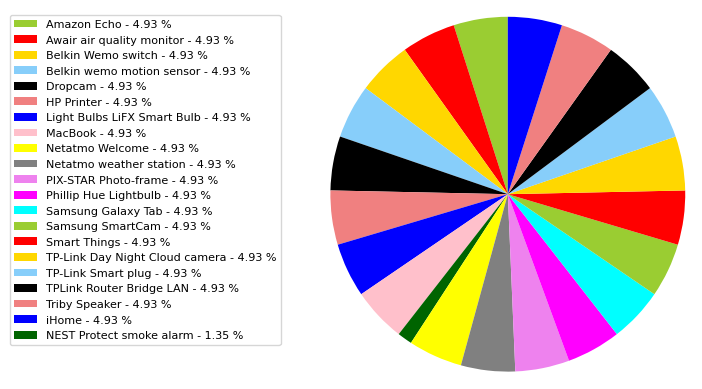

**********************************************************************************************************************************






./small/DI-S2.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 1000, 'MacBook': 1000, 'NEST Protect smoke alarm': 363, 'Netatmo Welcome': 1000, 'Netatmo weather station': 1000, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 1000, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 1000, 'iHome': 1000}


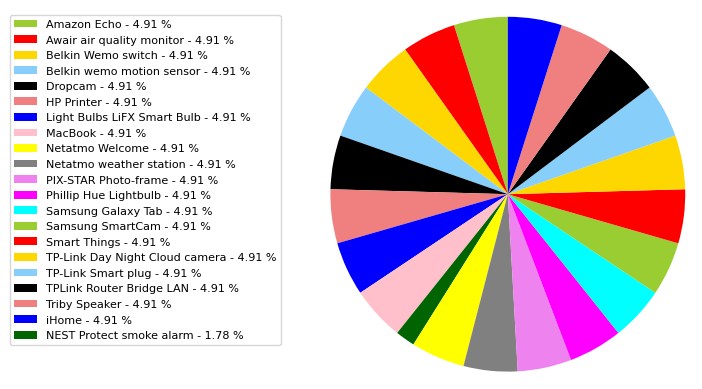

**********************************************************************************************************************************






./small/AD-S2.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 926, 'MacBook': 1000, 'NEST Protect smoke alarm': 289, 'Netatmo Welcome': 1000, 'Netatmo weather station': 446, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 515, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 376, 'iHome': 1000}


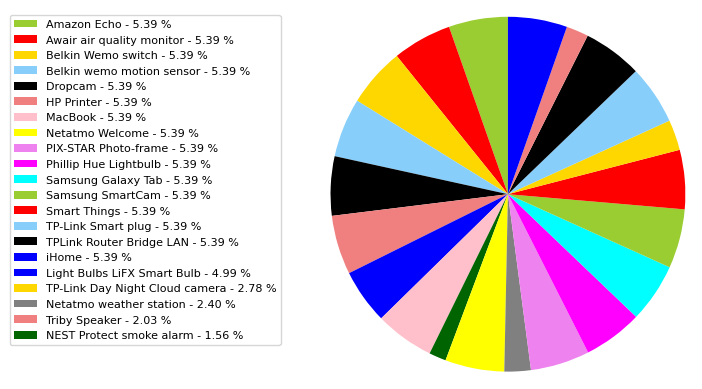

**********************************************************************************************************************************






./small/DI-S2.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 1000, 'MacBook': 1000, 'NEST Protect smoke alarm': 363, 'Netatmo Welcome': 1000, 'Netatmo weather station': 1000, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 1000, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 1000, 'iHome': 1000}


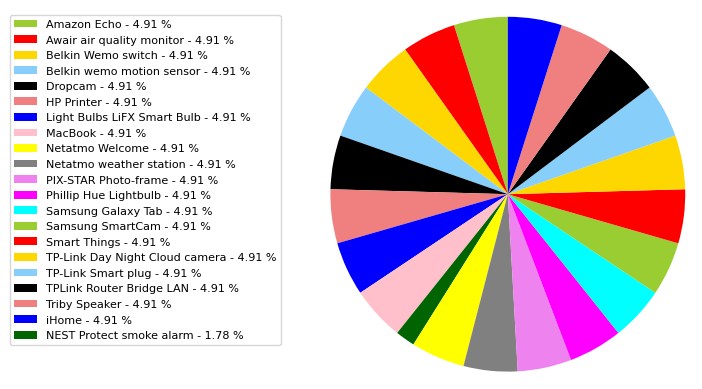

**********************************************************************************************************************************






./small/AD-S2.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 926, 'MacBook': 1000, 'NEST Protect smoke alarm': 289, 'Netatmo Welcome': 1000, 'Netatmo weather station': 446, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 515, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 376, 'iHome': 1000}


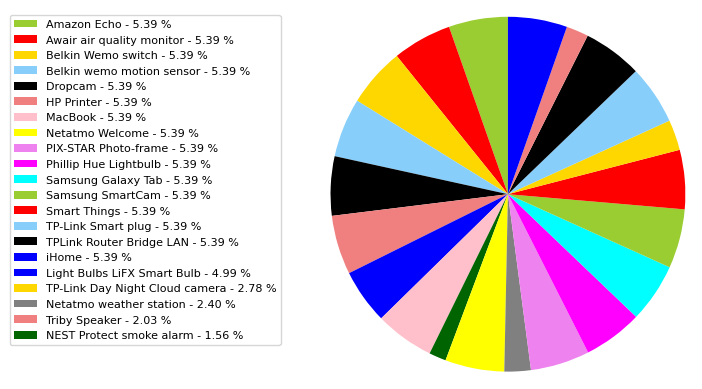

**********************************************************************************************************************************






./small/DI-S1.csv
{'Amazon Echo': 1000, 'Awair air quality monitor': 1000, 'Belkin Wemo switch': 1000, 'Belkin wemo motion sensor': 1000, 'Dropcam': 1000, 'HP Printer': 1000, 'Light Bulbs LiFX Smart Bulb': 1000, 'MacBook': 1000, 'NEST Protect smoke alarm': 219, 'Netatmo Welcome': 1000, 'Netatmo weather station': 1000, 'PIX-STAR Photo-frame': 1000, 'Phillip Hue Lightbulb': 1000, 'Samsung Galaxy Tab': 1000, 'Samsung SmartCam': 1000, 'Smart Things': 1000, 'TP-Link Day Night Cloud camera': 1000, 'TP-Link Smart plug': 1000, 'TPLink Router Bridge LAN': 1000, 'Triby Speaker': 1000, 'iHome': 1000}


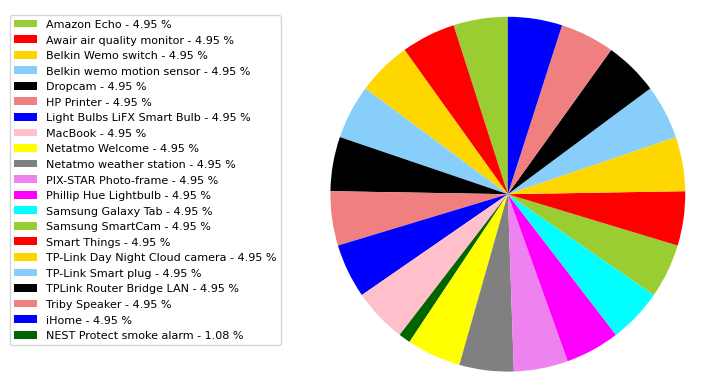

**********************************************************************************************************************************








In [4]:
for i in file_list:
    print(file_list[i][0])
    makePie(file_list[i][0])
    print("*"*130)
    print("\n"*5)

In [5]:
from  ML_initial_test import ML

fold=1
#df=ML(GA_input_features,train,vali,test,fold)

In [6]:
files_add=['csvs\\AD-S1.csv', 'csvs\\AD-S2.csv', 'csvs\\DI-S1.csv', 'csvs\\DI-S2.csv']
for i in files_add:
    df=pd.read_csv(i)
    df = df.groupby('Label').apply(lambda x: x.sample(n=min(1000, len(x))))
    df = df.droplevel('Label')
    name=i.replace("csvs","small")
    df.to_csv(name,index=False)

In [7]:
from  ML_initial_test import ML
#ml_list={"BaggingClassifier":BaggingClassifier()}
ml_list={"DecisionTreeClassifier":DecisionTreeClassifier()}

fold=1
df=ML(GA_input_features,train,vali,test,fold,ml_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.94s/it]

    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4831     0.4571           0       0.482     0.4555           0        4.9317


In [8]:
def FeatureMaker(f):
    selected=[]
    for i,ii in enumerate(f):
        if ii:
            selected.append(GA_input_features[i])
    return selected

In [9]:
def ReadCSV(features,train,vali,test):
    df = pd.read_csv(train,usecols=features)#,header=None )
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(vali,usecols=features)#,header=None )
    X_vali =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_vali=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(test,usecols=features)#,header=None )
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  
    return X_train, y_train,  X_vali, y_vali, X_test, y_test

In [10]:
model=DecisionTreeClassifier()

In [11]:
#defining various steps required for the genetic algorithm
# GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool_)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:,chromosome],y_train)
        predictions = model.predict(X_test.iloc[:,chromosome])
        scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        second=time.time()
        scores, pop_after_fit = fitness_score(population_nextgen)
        #print(scores[:2])
        zaman=time.time()-second
        print ('%-30s %-30s %-30s' % (np.mean(scores),np.std(scores),zaman))

        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [13]:
final_features=[]

for i in file_list:
    print(file_list[i][0],file_list[i][1])
    features=GA_input_features
    train=file_list[i][0]
    vali=file_list[i][1]
    test=file_list[i][2]
    X_train, y_train, X_test, y_test, X_final, y_final=ReadCSV(features,train,vali,test)
    fold=1
    print("Before GA")
    df=ML(GA_input_features,train,vali,test,fold,ml_list)
    
    print ('\n\n%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.05,
                         n_gen=25,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    print("\n\nAfter GA")
    selected=FeatureMaker(chromo[-1])
    selected.append("Label")
    print(selected)
    df=ML(selected,train,vali,test,fold,ml_list)
    print("\n","*"*140,"\n\n\n\n\n")
    final_features.append(selected)

./small/AD-S1.csv ./small/DI-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.77s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4843     0.4628           0      0.4873     0.4634           0        4.7662


MEAN                           STD                            TIME                          
0.4751048248849794             0.026651120985397056           638.7948997020721             
0.4821306649164343             0.021441206203344953           709.3622658252716             
0.4866222156745929             0.024685045197195256           669.5781042575836             
0.49000220259187244            0.022944887141465347           640.7936325073242             
0.4928339452242288             0.02637508509993959            622.6269838809967             
0.4918698574904663             0.024762156243357734           613.4318599700928             
0.493219860031

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.27s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5059      0.499           0      0.5136     0.4938           0        2.2673

 ******************************************************************************************************************************************** 





./small/DI-S1.csv ./small/AD-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.25s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4394     0.4369           0      0.5737      0.548           0        4.2519


MEAN                           STD                            TIME                          
0.43967296503977854            0.020193350561360107           610.7424819469452             
0.4512109499103481             0.0244655281366573             699.1168401241302             
0.45627899143326545            0.022513507472818252           676.9719824790955             
0.45820523489443493            0.024411221635687312           656.9463176727295             
0.4632759251741296             0.023052910855706488           640.0079367160797             
0.4635441955501259             0.023128437377239658           633.5171332359314             
0.466341781345

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4284     0.4236           0      0.5274      0.508           0        1.7432

 ******************************************************************************************************************************************** 





./small/AD-S1.csv ./small/DI-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.66s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4853     0.4588           0      0.4868     0.4632           0        4.6552


MEAN                           STD                            TIME                          
0.47503338545530427            0.02328888960711136            632.6208701133728             
0.4818846932286955             0.022451287694244742           705.5630946159363             
0.49064220912975814            0.020412046515669562           675.3236076831818             
0.49417933617812704            0.023116154121776505           650.6566395759583             
0.4927295626734309             0.025030947402183167           637.2970993518829             
0.4967437977687786             0.02540669771373595            618.1480450630188             
0.499713945455

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4946     0.4668           0      0.4788     0.4604           0         1.856

 ******************************************************************************************************************************************** 





./small/DI-S2.csv ./small/AD-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.73s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5171     0.5233           0      0.6473     0.6118           0        4.7276


MEAN                           STD                            TIME                          
0.47489648318818395            0.02598965122012075            675.9056422710419             
0.4777578944207691             0.024188091267934295           776.9633820056915             
0.4845995147733966             0.02525761197533035            749.5174095630646             
0.48037176643536866            0.027629204029998456           722.9022538661957             
0.48150609574994985            0.0255207263081117             694.2025847434998             
0.4824193791857926             0.024019445146491035           682.4692053794861             
0.485235264791

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.14s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4783     0.4789           0      0.5922     0.5711           0        2.1415

 ******************************************************************************************************************************************** 





./small/AD-S2.csv ./small/DI-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.36s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.462      0.435           0      0.4412     0.4222           0        3.3525


MEAN                           STD                            TIME                          
0.4437863485339161             0.027090678529360562           480.81535053253174            
0.4518087764565537             0.025841654902871616           548.1681401729584             
0.4568085004178488             0.02585746213145221            525.387387752533              
0.466116817716316              0.028575049644654373           517.8839814662933             
0.469692729563069              0.029577379187170228           505.5363531112671             
0.47613387057359247            0.026838553713201565           486.16981196403503            
0.474222277451

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4846       0.46           0      0.4779     0.4544           0        2.0726

 ******************************************************************************************************************************************** 





./small/DI-S2.csv ./small/AD-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.75s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.6184     0.5858           0      0.5015     0.5085           0        4.7467


MEAN                           STD                            TIME                          
0.5654951181919646             0.030251114782647158           678.1981701850891             
0.5644872939473636             0.02980403507637977            774.6572616100311             
0.5693153101670035             0.030536662590631515           740.5047535896301             
0.5762390587458157             0.030058749113357455           717.4566559791565             
0.5777912944455926             0.029543259185960995           698.6697835922241             
0.5783705140259924             0.03226806177460109            679.8457515239716             
0.578749742379

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.6092     0.5959           0      0.4937     0.5058           0        2.5136

 ******************************************************************************************************************************************** 





./small/AD-S2.csv ./small/DI-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.26s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4395      0.417           0       0.463     0.4385           0        3.2603


MEAN                           STD                            TIME                          
0.434104388906512              0.02827522831027856            477.12548995018005            
0.44251416004918365            0.027357450289943356           548.4378414154053             
0.44978855757468433            0.02719118757547787            532.6119899749756             
0.45955215853281334            0.02648283075895201            515.5984725952148             
0.45983449533638077            0.030731892315176562           496.80762362480164            
0.46187213043165315            0.030673494325863786           484.38802671432495            
0.466420392375

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4423     0.4267           0      0.4226     0.4027           0        2.0703

 ******************************************************************************************************************************************** 





./small/DI-S1.csv ./small/AD-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.25s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.557     0.5316           0      0.4222     0.4217           0        4.2425


MEAN                           STD                            TIME                          
0.5497343000076529             0.027463714932975926           616.2555055618286             
0.5565476605983976             0.03032241176186934            698.8921825885773             
0.5594273571941678             0.028132780152987785           666.0772783756256             
0.5648841511408034             0.027620102639443433           641.3346090316772             
0.5667152884526939             0.02851023840743319            624.0731387138367             
0.5714114994202941             0.02986671190094795            605.8683881759644             
0.571977799636

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.39s/it]

    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5243     0.5311           0      0.4463     0.4557           0        2.3881

 ******************************************************************************************************************************************** 







In [14]:
for i in final_features:
    print(len(i))

51
40
44
41
59
50
52
46


In [15]:
final_features

[['HH_0.01_covariance_0_1',
  'HH_0.01_mean_0',
  'HH_0.01_pcc_0_1',
  'HH_0.01_radius_0_1',
  'HH_0.01_std_0',
  'HH_0.1_magnitude_0_1',
  'HH_0.1_std_0',
  'HH_0.1_weight_0',
  'HH_1_covariance_0_1',
  'HH_1_pcc_0_1',
  'HH_1_radius_0_1',
  'HH_1_weight_0',
  'HH_3_magnitude_0_1',
  'HH_3_pcc_0_1',
  'HH_3_radius_0_1',
  'HH_3_std_0',
  'HH_3_weight_0',
  'HH_5_mean_0',
  'HH_5_std_0',
  'HH_jit_0.01_mean',
  'HH_jit_0.1_mean',
  'HH_jit_0.1_std',
  'HH_jit_0.1_weight',
  'HH_jit_1_mean',
  'HH_jit_1_std',
  'HH_jit_3_weight',
  'HH_jit_5_std',
  'HH_jit_5_weight',
  'HpHp_0.01_magnitude_0_1',
  'HpHp_0.01_weight_0',
  'HpHp_0.1_covariance_0_1',
  'HpHp_0.1_mean_0',
  'HpHp_0.1_pcc_0_1',
  'HpHp_0.1_std_0',
  'HpHp_0.1_weight_0',
  'HpHp_1_covariance_0_1',
  'HpHp_1_pcc_0_1',
  'HpHp_1_radius_0_1',
  'HpHp_1_std_0',
  'HpHp_3_pcc_0_1',
  'HpHp_5_radius_0_1',
  'HpHp_5_std_0',
  'HpHp_5_weight_0',
  'MI_dir_0.01_mean',
  'MI_dir_0.01_weight',
  'MI_dir_0.1_std',
  'MI_dir_0.1_weight',

In [16]:
all_features)

SyntaxError: unmatched ')' (1740279071.py, line 1)

In [17]:
graph=[GA_input_features]


for i in final_features:
    temp=[]
    for ii in GA_input_features:
        if ii in i:
            temp.append(1)
        else:
            temp.append(0)
    graph.append(temp)
        

In [18]:
graph = pd.DataFrame (graph[1:], columns = graph[0])
graph

,HH_0.01_covariance_0_1,HH_0.01_magnitude_0_1,HH_0.01_mean_0,HH_0.01_pcc_0_1,HH_0.01_radius_0_1,HH_0.01_std_0,HH_0.01_weight_0,HH_0.1_covariance_0_1,HH_0.1_magnitude_0_1,HH_0.1_mean_0,...,MI_dir_1_mean,MI_dir_1_std,MI_dir_1_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_3_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_5_weight,Label
0,1,0,1,1,1,1,0,0,1,0,...,0,0,0,1,0,0,1,1,0,1
1,0,1,1,0,0,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
3,1,1,0,0,0,1,0,1,0,1,...,0,0,1,1,0,1,1,0,1,1
4,1,0,1,0,0,1,1,1,1,1,...,1,1,0,0,0,0,1,1,0,1
5,0,0,0,1,1,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,1
6,1,0,1,0,1,0,0,1,1,1,...,1,1,1,0,0,1,1,1,1,1
7,1,0,0,1,1,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,1


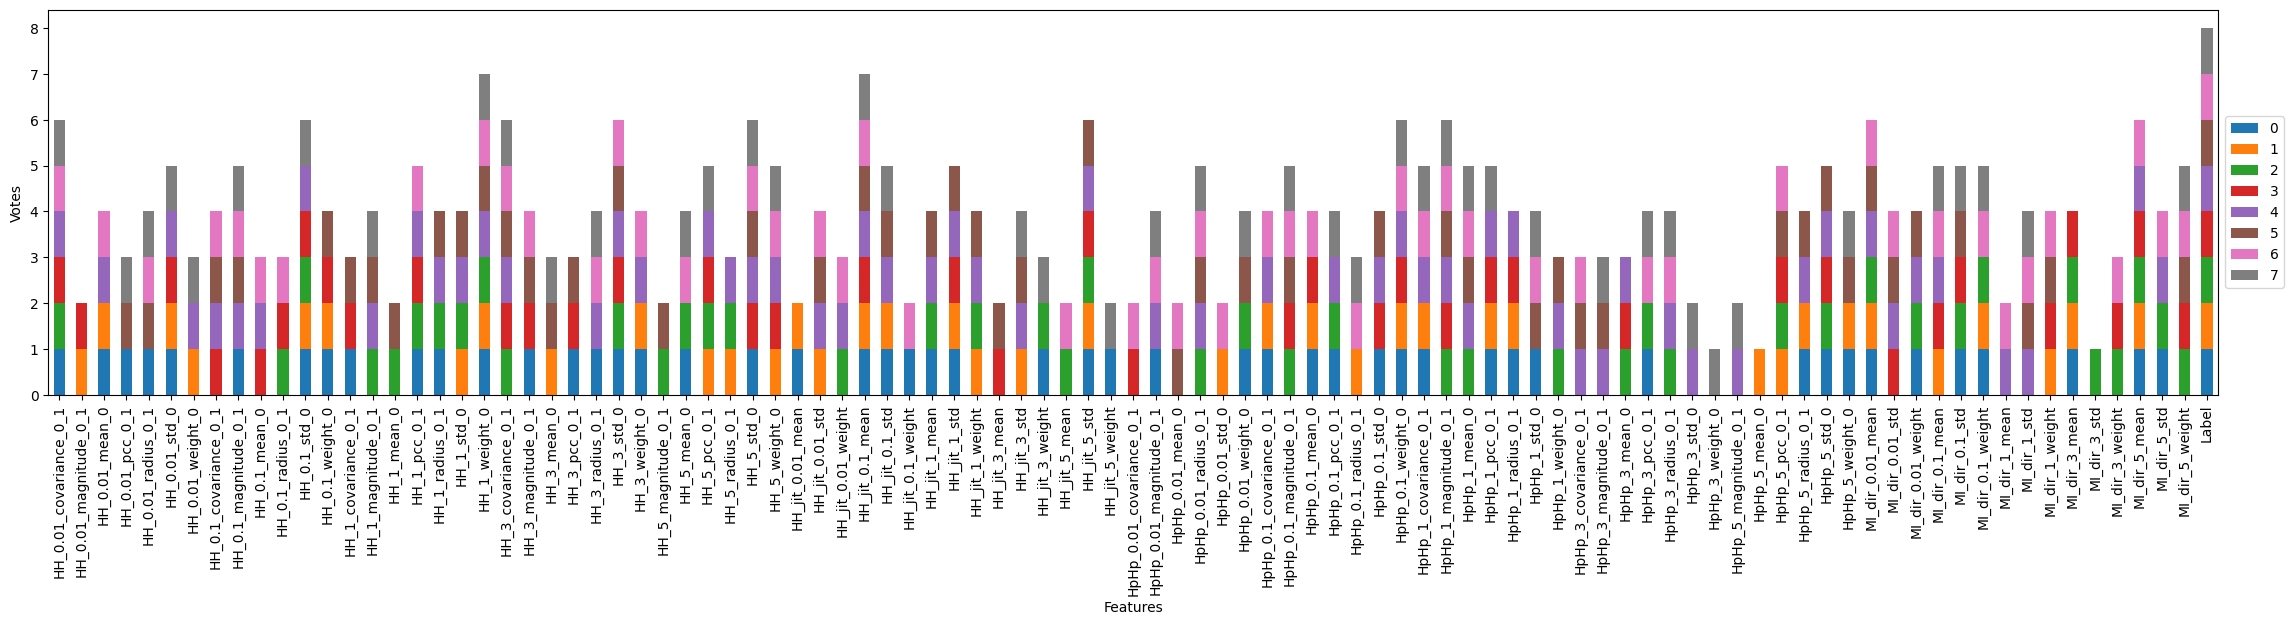

In [19]:
df=graph.T
df.plot.bar(stacked=True,figsize=(28,5))#,color=list(colors.values()))
plt.xlabel('Features')
plt.ylabel('Votes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("grf.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()

In [20]:
fdict={}
for i in range(2,9):
    fdict[i]=[]
    

In [21]:
fdict

{2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}

In [22]:

for ii,i in enumerate(df.values):
    temp=sum(i)
    for j in range(temp,0,-1):
        try:
           fdict[j].append(df.index[ii])
        except:pass
        
    

In [23]:
fdict

{2: ['HH_0.01_covariance_0_1',
  'HH_0.01_magnitude_0_1',
  'HH_0.01_mean_0',
  'HH_0.01_pcc_0_1',
  'HH_0.01_radius_0_1',
  'HH_0.01_std_0',
  'HH_0.01_weight_0',
  'HH_0.1_covariance_0_1',
  'HH_0.1_magnitude_0_1',
  'HH_0.1_mean_0',
  'HH_0.1_radius_0_1',
  'HH_0.1_std_0',
  'HH_0.1_weight_0',
  'HH_1_covariance_0_1',
  'HH_1_magnitude_0_1',
  'HH_1_mean_0',
  'HH_1_pcc_0_1',
  'HH_1_radius_0_1',
  'HH_1_std_0',
  'HH_1_weight_0',
  'HH_3_covariance_0_1',
  'HH_3_magnitude_0_1',
  'HH_3_mean_0',
  'HH_3_pcc_0_1',
  'HH_3_radius_0_1',
  'HH_3_std_0',
  'HH_3_weight_0',
  'HH_5_magnitude_0_1',
  'HH_5_mean_0',
  'HH_5_pcc_0_1',
  'HH_5_radius_0_1',
  'HH_5_std_0',
  'HH_5_weight_0',
  'HH_jit_0.01_mean',
  'HH_jit_0.01_std',
  'HH_jit_0.01_weight',
  'HH_jit_0.1_mean',
  'HH_jit_0.1_std',
  'HH_jit_0.1_weight',
  'HH_jit_1_mean',
  'HH_jit_1_std',
  'HH_jit_1_weight',
  'HH_jit_3_mean',
  'HH_jit_3_std',
  'HH_jit_3_weight',
  'HH_jit_5_mean',
  'HH_jit_5_std',
  'HH_jit_5_weight',
  

In [ ]:
fdict={2: ['HH_0.01_covariance_0_1',
  'HH_0.01_magnitude_0_1',
  'HH_0.01_mean_0',
  'HH_0.01_pcc_0_1',
  'HH_0.01_radius_0_1',
  'HH_0.01_std_0',
  'HH_0.01_weight_0',
  'HH_0.1_covariance_0_1',
  'HH_0.1_magnitude_0_1',
  'HH_0.1_mean_0',
  'HH_0.1_radius_0_1',
  'HH_0.1_std_0',
  'HH_0.1_weight_0',
  'HH_1_covariance_0_1',
  'HH_1_magnitude_0_1',
  'HH_1_mean_0',
  'HH_1_pcc_0_1',
  'HH_1_radius_0_1',
  'HH_1_std_0',
  'HH_1_weight_0',
  'HH_3_covariance_0_1',
  'HH_3_magnitude_0_1',
  'HH_3_mean_0',
  'HH_3_pcc_0_1',
  'HH_3_radius_0_1',
  'HH_3_std_0',
  'HH_3_weight_0',
  'HH_5_magnitude_0_1',
  'HH_5_mean_0',
  'HH_5_pcc_0_1',
  'HH_5_radius_0_1',
  'HH_5_std_0',
  'HH_5_weight_0',
  'HH_jit_0.01_mean',
  'HH_jit_0.01_std',
  'HH_jit_0.01_weight',
  'HH_jit_0.1_mean',
  'HH_jit_0.1_std',
  'HH_jit_0.1_weight',
  'HH_jit_1_mean',
  'HH_jit_1_std',
  'HH_jit_1_weight',
  'HH_jit_3_mean',
  'HH_jit_3_std',
  'HH_jit_3_weight',
  'HH_jit_5_mean',
  'HH_jit_5_std',
  'HH_jit_5_weight',
  'HpHp_0.01_covariance_0_1',
  'HpHp_0.01_magnitude_0_1',
  'HpHp_0.01_mean_0',
  'HpHp_0.01_radius_0_1',
  'HpHp_0.01_std_0',
  'HpHp_0.01_weight_0',
  'HpHp_0.1_covariance_0_1',
  'HpHp_0.1_magnitude_0_1',
  'HpHp_0.1_mean_0',
  'HpHp_0.1_pcc_0_1',
  'HpHp_0.1_radius_0_1',
  'HpHp_0.1_std_0',
  'HpHp_0.1_weight_0',
  'HpHp_1_covariance_0_1',
  'HpHp_1_magnitude_0_1',
  'HpHp_1_mean_0',
  'HpHp_1_pcc_0_1',
  'HpHp_1_radius_0_1',
  'HpHp_1_std_0',
  'HpHp_1_weight_0',
  'HpHp_3_covariance_0_1',
  'HpHp_3_magnitude_0_1',
  'HpHp_3_mean_0',
  'HpHp_3_pcc_0_1',
  'HpHp_3_radius_0_1',
  'HpHp_3_std_0',
  'HpHp_5_magnitude_0_1',
  'HpHp_5_pcc_0_1',
  'HpHp_5_radius_0_1',
  'HpHp_5_std_0',
  'HpHp_5_weight_0',
  'MI_dir_0.01_mean',
  'MI_dir_0.01_std',
  'MI_dir_0.01_weight',
  'MI_dir_0.1_mean',
  'MI_dir_0.1_std',
  'MI_dir_0.1_weight',
  'MI_dir_1_mean',
  'MI_dir_1_std',
  'MI_dir_1_weight',
  'MI_dir_3_mean',
  'MI_dir_3_weight',
  'MI_dir_5_mean',
  'MI_dir_5_std',
  'MI_dir_5_weight',
  'Label'],
 3: ['HH_0.01_covariance_0_1',
  'HH_0.01_mean_0',
  'HH_0.01_pcc_0_1',
  'HH_0.01_radius_0_1',
  'HH_0.01_std_0',
  'HH_0.01_weight_0',
  'HH_0.1_covariance_0_1',
  'HH_0.1_magnitude_0_1',
  'HH_0.1_mean_0',
  'HH_0.1_radius_0_1',
  'HH_0.1_std_0',
  'HH_0.1_weight_0',
  'HH_1_covariance_0_1',
  'HH_1_magnitude_0_1',
  'HH_1_pcc_0_1',
  'HH_1_radius_0_1',
  'HH_1_std_0',
  'HH_1_weight_0',
  'HH_3_covariance_0_1',
  'HH_3_magnitude_0_1',
  'HH_3_mean_0',
  'HH_3_pcc_0_1',
  'HH_3_radius_0_1',
  'HH_3_std_0',
  'HH_3_weight_0',
  'HH_5_mean_0',
  'HH_5_pcc_0_1',
  'HH_5_radius_0_1',
  'HH_5_std_0',
  'HH_5_weight_0',
  'HH_jit_0.01_std',
  'HH_jit_0.01_weight',
  'HH_jit_0.1_mean',
  'HH_jit_0.1_std',
  'HH_jit_1_mean',
  'HH_jit_1_std',
  'HH_jit_1_weight',
  'HH_jit_3_std',
  'HH_jit_3_weight',
  'HH_jit_5_std',
  'HpHp_0.01_magnitude_0_1',
  'HpHp_0.01_radius_0_1',
  'HpHp_0.01_weight_0',
  'HpHp_0.1_covariance_0_1',
  'HpHp_0.1_magnitude_0_1',
  'HpHp_0.1_mean_0',
  'HpHp_0.1_pcc_0_1',
  'HpHp_0.1_radius_0_1',
  'HpHp_0.1_std_0',
  'HpHp_0.1_weight_0',
  'HpHp_1_covariance_0_1',
  'HpHp_1_magnitude_0_1',
  'HpHp_1_mean_0',
  'HpHp_1_pcc_0_1',
  'HpHp_1_radius_0_1',
  'HpHp_1_std_0',
  'HpHp_1_weight_0',
  'HpHp_3_covariance_0_1',
  'HpHp_3_magnitude_0_1',
  'HpHp_3_mean_0',
  'HpHp_3_pcc_0_1',
  'HpHp_3_radius_0_1',
  'HpHp_5_pcc_0_1',
  'HpHp_5_radius_0_1',
  'HpHp_5_std_0',
  'HpHp_5_weight_0',
  'MI_dir_0.01_mean',
  'MI_dir_0.01_std',
  'MI_dir_0.01_weight',
  'MI_dir_0.1_mean',
  'MI_dir_0.1_std',
  'MI_dir_0.1_weight',
  'MI_dir_1_std',
  'MI_dir_1_weight',
  'MI_dir_3_mean',
  'MI_dir_3_weight',
  'MI_dir_5_mean',
  'MI_dir_5_std',
  'MI_dir_5_weight',
  'Label'],
 4: ['HH_0.01_covariance_0_1',
  'HH_0.01_mean_0',
  'HH_0.01_radius_0_1',
  'HH_0.01_std_0',
  'HH_0.1_covariance_0_1',
  'HH_0.1_magnitude_0_1',
  'HH_0.1_std_0',
  'HH_0.1_weight_0',
  'HH_1_magnitude_0_1',
  'HH_1_pcc_0_1',
  'HH_1_radius_0_1',
  'HH_1_std_0',
  'HH_1_weight_0',
  'HH_3_covariance_0_1',
  'HH_3_magnitude_0_1',
  'HH_3_radius_0_1',
  'HH_3_std_0',
  'HH_3_weight_0',
  'HH_5_mean_0',
  'HH_5_pcc_0_1',
  'HH_5_std_0',
  'HH_5_weight_0',
  'HH_jit_0.01_std',
  'HH_jit_0.1_mean',
  'HH_jit_0.1_std',
  'HH_jit_1_mean',
  'HH_jit_1_std',
  'HH_jit_1_weight',
  'HH_jit_3_std',
  'HH_jit_5_std',
  'HpHp_0.01_magnitude_0_1',
  'HpHp_0.01_radius_0_1',
  'HpHp_0.01_weight_0',
  'HpHp_0.1_covariance_0_1',
  'HpHp_0.1_magnitude_0_1',
  'HpHp_0.1_mean_0',
  'HpHp_0.1_pcc_0_1',
  'HpHp_0.1_std_0',
  'HpHp_0.1_weight_0',
  'HpHp_1_covariance_0_1',
  'HpHp_1_magnitude_0_1',
  'HpHp_1_mean_0',
  'HpHp_1_pcc_0_1',
  'HpHp_1_radius_0_1',
  'HpHp_1_std_0',
  'HpHp_3_pcc_0_1',
  'HpHp_3_radius_0_1',
  'HpHp_5_pcc_0_1',
  'HpHp_5_radius_0_1',
  'HpHp_5_std_0',
  'HpHp_5_weight_0',
  'MI_dir_0.01_mean',
  'MI_dir_0.01_std',
  'MI_dir_0.01_weight',
  'MI_dir_0.1_mean',
  'MI_dir_0.1_std',
  'MI_dir_0.1_weight',
  'MI_dir_1_std',
  'MI_dir_1_weight',
  'MI_dir_3_mean',
  'MI_dir_5_mean',
  'MI_dir_5_std',
  'MI_dir_5_weight',
  'Label'],
 5: ['HH_0.01_covariance_0_1',
  'HH_0.01_std_0',
  'HH_0.1_magnitude_0_1',
  'HH_0.1_std_0',
  'HH_1_pcc_0_1',
  'HH_1_weight_0',
  'HH_3_covariance_0_1',
  'HH_3_std_0',
  'HH_5_pcc_0_1',
  'HH_5_std_0',
  'HH_5_weight_0',
  'HH_jit_0.1_mean',
  'HH_jit_0.1_std',
  'HH_jit_1_std',
  'HH_jit_5_std',
  'HpHp_0.01_radius_0_1',
  'HpHp_0.1_magnitude_0_1',
  'HpHp_0.1_weight_0',
  'HpHp_1_covariance_0_1',
  'HpHp_1_magnitude_0_1',
  'HpHp_1_mean_0',
  'HpHp_1_pcc_0_1',
  'HpHp_5_pcc_0_1',
  'HpHp_5_std_0',
  'MI_dir_0.01_mean',
  'MI_dir_0.1_mean',
  'MI_dir_0.1_std',
  'MI_dir_0.1_weight',
  'MI_dir_5_mean',
  'MI_dir_5_weight',
  'Label'],
 6: ['HH_0.01_covariance_0_1',
  'HH_0.1_std_0',
  'HH_1_weight_0',
  'HH_3_covariance_0_1',
  'HH_3_std_0',
  'HH_5_std_0',
  'HH_jit_0.1_mean',
  'HH_jit_5_std',
  'HpHp_0.1_weight_0',
  'HpHp_1_magnitude_0_1',
  'MI_dir_0.01_mean',
  'MI_dir_5_mean',
  'Label'],
 7: ['HH_1_weight_0', 'HH_jit_0.1_mean', 'Label'],
 8: ['Label']}
